In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft # For the fourier transform
from scipy.interpolate import griddata # For the interpolation
from scipy.optimize import curve_fit
from scipy import signal
import pandas as pd
import glob

In [2]:
def load_wli_data(path):
    
    data_df = pd.read_csv(path, delimiter=' ', skiprows=14, usecols=[0, 1, 2], skipfooter=1, engine='python')

    data_df = data_df.replace('No', np.nan)

    data_df.astype(float, errors='ignore')

    print(data_df)
    
    data = pd.DataFrame.to_numpy(data_df).T

    return data

def grid_wli(raw_data):

    x_list = raw_data[0].astype(int)
    y_list = raw_data[1].astype(int)
    z_list = raw_data[2].astype(float)
    z_list = z_list - np.nanmin(z_list) 

    # x_list = abs(x_list - max(x_list))
    y_list = abs(y_list - max(y_list))

    # Here, length // spacing = number of points
    x = np.linspace(0, max(x_list), max(x_list) + 1)
    y = np.linspace(0, max(y_list), max(y_list) + 1)
    print(x, y)
    X, Y = np.meshgrid(x, y)

    # Interpolate the data onto the grid
    # fit_data[0] is the bottom row, fit_data[-1] is the top row. fit_data[:,0] is the left column, fit_data[:,-1] is the right column
    # Index row by row by going from fit_data[0] to fit_data[-1] for fft
    # Fill any NaN values with the mean of the data
    fit_data = griddata((x_list, y_list), z_list, (X, Y), method='linear', fill_value=np.nan) 

    # Plot the data
    plt.contourf(X, Y, fit_data, levels=100, cmap='jet')
    plt.colorbar()
    
def combined_save(path):

    data_df = pd.read_csv(path, delimiter=' ', skiprows=14, usecols=[0, 1, 2], skipfooter=1, engine='python')

    data_df = data_df.replace('No', np.nan)

    data_df.astype(float, errors='ignore')

    data = pd.DataFrame.to_numpy(data_df).T

    x_list = data[0].astype(int)
    y_list = data[1].astype(int)
    z_list = data[2].astype(float)
    z_list = z_list - np.nanmin(z_list) 

    y_list = abs(y_list - max(y_list))

    # Here, length // spacing = number of points
    x = np.linspace(0, max(x_list), max(x_list) + 1)
    y = np.linspace(0, max(y_list), max(y_list) + 1)
    print(x, y)
    X, Y = np.meshgrid(x, y)

    # Interpolate the data onto the grid
    # fit_data[0] is the bottom row, fit_data[-1] is the top row. fit_data[:,0] is the left column, fit_data[:,-1] is the right column
    # Index row by row by going from fit_data[0] to fit_data[-1] for fft
    # Fill any NaN values with the mean of the data
    fit_data = griddata((x_list, y_list), z_list, (X, Y), method='linear', fill_value=np.nan) 

    # Title of plot
    filename = path[-21:-4]
    directory_path = path[0:-21]

    # Plot the data
    fig, ax = plt.subplots()
    cs = ax.contourf(X, Y, fit_data, levels=100, cmap='jet')
    cbar = fig.colorbar(cs)
    cbar.set_label('Microns')
    plt.xlabel('Microns')
    plt.ylabel('Microns')
    plt.title(filename)
    plt.savefig(directory_path + filename + '_py')

    print(f'Saved as {filename}')
    plt.close(fig)

            0   0.1   161.4082
0           1     0  161.56549
1           2     0  161.85824
2           3     0  162.25047
3           4     0  162.74179
4           5     0  163.18161
...       ...   ...        ...
1048570  1019  1023  31.980289
1048571  1020  1023  31.609897
1048572  1021  1023  31.522203
1048573  1022  1023   31.50087
1048574  1023  1023  31.365929

[1048575 rows x 3 columns]
[0.000e+00 1.000e+00 2.000e+00 ... 1.021e+03 1.022e+03 1.023e+03] [0.000e+00 1.000e+00 2.000e+00 ... 1.021e+03 1.022e+03 1.023e+03]


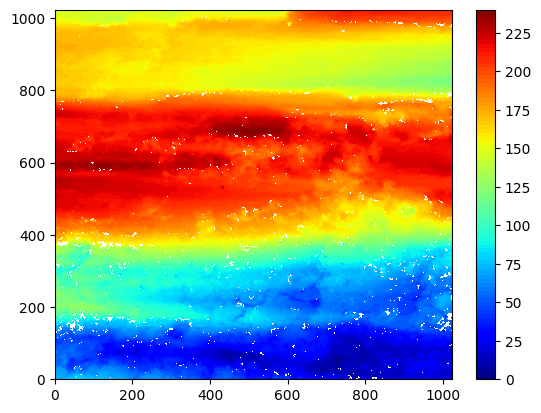

In [3]:
JBZQ05_275_1_001 = load_wli_data('C:/Users/stickslip/Documents/leki-files/mcgill-natural-faults/white-light/JBZQ05_275_1_001.xyz')
# JBZQ05_275_2_001 = load_wli_data('C:/Users/stickslip/Documents/leki-files/mcgill-natural-faults/white-light/JBZQ05_275_2_003.xyz')

grid_wli(JBZQ05_275_1_001)


### Run this if you dare (will take a long time)

In [17]:
file_list = glob.glob('C:/Users/stickslip/Documents/leki-files/mcgill-natural-faults/white-light/' + '/*.xyz')

for filepath in file_list:
    combined_save(filepath)

[0.000e+00 1.000e+00 2.000e+00 ... 1.021e+03 1.022e+03 1.023e+03] [0.000e+00 1.000e+00 2.000e+00 ... 1.021e+03 1.022e+03 1.023e+03]
Saved as \JBZQ05_10_05_001
[0.000e+00 1.000e+00 2.000e+00 ... 2.662e+03 2.663e+03 2.664e+03] [0.000e+00 1.000e+00 2.000e+00 ... 1.027e+03 1.028e+03 1.029e+03]
Saved as t\JBZQ05_10_1_001
[0.000e+00 1.000e+00 2.000e+00 ... 1.021e+03 1.022e+03 1.023e+03] [0.000e+00 1.000e+00 2.000e+00 ... 1.021e+03 1.022e+03 1.023e+03]


            0   0.1   No
0           1     0  NaN
1           2     0  NaN
2           3     0  NaN
3           4     0  NaN
4           5     0  NaN
...       ...   ...  ...
2044751  1986  1026  NaN
2044752  1987  1026  NaN
2044753  1988  1026  NaN
2044754  1989  1026  NaN
2044755  1990  1026  NaN

[2044756 rows x 3 columns]
[0.00000000e+00 1.00100553e+00 2.00201106e+00 ... 1.98899799e+03
 1.98999899e+03 1.99100000e+03] [0.00000000e+00 1.00195312e+00 2.00390625e+00 ... 1.02399609e+03
 1.02499805e+03 1.02600000e+03]


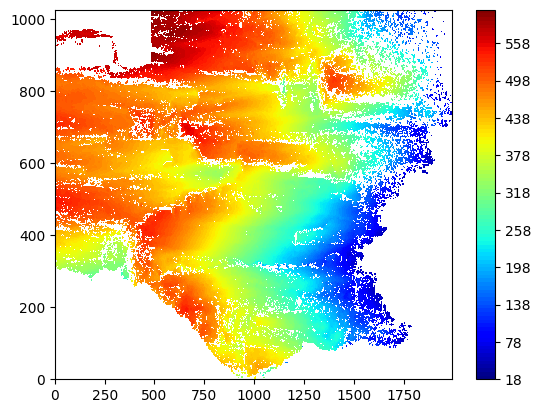

In [16]:
JBZQ05_stitch = load_wli_data('C:/Users/stickslip/Documents/leki-files/mcgill-natural-faults/white-light/JBZQ05_275_05_002.xyz')

grid_wli(JBZQ05_stitch)

In [3]:
jbzq05_10_2_002 = load_wli_data('C:/Users/stickslip/Documents/leki-files/mcgill-natural-faults/white-light/JBZQ05_10_1_004.xyz')

            1     0         No
0           2     0        NaN
1           3     0        NaN
2           4     0  51621.637
3           5     0        NaN
4           6     0        NaN
...       ...   ...        ...
4896319  2851  1714  51659.773
4896320  2852  1714  51659.462
4896321  2853  1714  51659.083
4896322  2854  1714        NaN
4896323  2855  1714        NaN

[4896324 rows x 3 columns]


[0.000e+00 1.000e+00 2.000e+00 ... 2.853e+03 2.854e+03 2.855e+03] [0.000e+00 1.000e+00 2.000e+00 ... 1.712e+03 1.713e+03 1.714e+03]


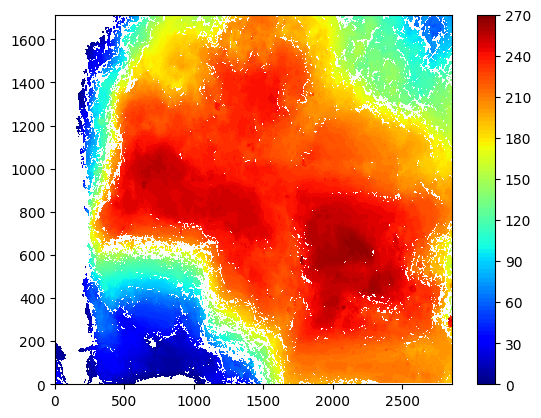

In [6]:
grid_wli(jbzq05_10_2_002)